# Final Project Submission: Regression Models - KC Housing Data

Please fill out:
* Student name: Princess 'Seun' Otusanya
* Student pace: Self Paced
* Scheduled project review date/time: March 09, 2021 / 5:00PM
* Instructor name: Jeff Herman
* Blog post URL: [Visualizations for Data Science](https://seunotusanya.medium.com/visualization-for-data-science-ae6cf75c9514)

## Objective
In this Jupyter notebook we will finally be working on Linear Regression and finding the best fit model for our business case. The order of business is as follows: 
- Linear Regression
- Feature Selection
- Train-Test Split
- Cross Validation

### Import neccesary Libraries and Load Data

In [1]:
# Let's start by importing nessesary libraries
import pandas as pd
import numpy as np

# For visualizations
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline

# For regression
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
# Import new and improved data and drop extra default index
kc_reg = pd.read_csv('Data/kc_reg.csv')
kc_reg.drop(['Unnamed: 0'], axis=1, inplace=True)
# Print top 5 rows to ensure data loads properly
kc_reg.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,yr_built,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.0,3,1.0,1180,5650,0.0,0.0,3,7,1955,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.5,2570,7242,0.0,0.0,3,7,1951,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.0,770,10000,0.0,0.0,3,6,1933,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.0,1960,5000,0.0,0.0,5,7,1965,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.0,1680,8080,0.0,0.0,3,8,1987,...,0,0,0,0,0,0,0,0,0,0


#### Recap
A couple of things to remember from the previous notebook before getting started on Regression:
* No variable is 'perfectly' normal but 'sqft_living' comes pretty close.
* There are 2 predictors that are highly Correlated: 'sqft_living' and 'sqft_above'.
* Dummy variables have been created for _Norminal_ categorical variables.

## Linear Regression
Let's perform a series of simple regressions between the target variable and some predictors.

### Step 1: Check Distribution
We already checked for this in the EDA notebook and if we recall the results were:
- No variable is "perfectly" normal, but some do tend to follow an overall normal pattern, i.e, 'price', 'sqft_living', 'sqft_living15'.
- The target variable **'Price'** is moderately skewed to the right.
- **'Sqft_living' and 'Sqft_living15** are more normally distributed than the other features, this can be due to a high amount of variance in other features.
- The rest of the features are worse of in terms of normal distribution.

### Step 2: Test for Linearity Assumptions
There are 3 assumptions for Linear Regression: _Linearity_, _Normality_, and _Homoscedasticity_. We can check for them by performing the following steps:
- Run a simple regression in Statsmodel wtih the dependent and independent variables
- Plot a prediction line on a scatter plot with the dependent and independent variables
- Visualize the error term for variance and heteroscedasticity
- Check the normality assumptions by creating a QQ-plot

> Let's check to see if we have any practical Linear Regressions.

In [3]:
# Build a formula. 'sqft_living' is the most normally distributed variable so we'll start with that
f = 'price~sqft_living'
# Create a fitted model
model = smf.ols(formula=f, data=kc_reg).fit()
# Get regression model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     7668.
Date:                Tue, 09 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:32:31   Log-Likelihood:            -2.3365e+05
No. Observations:               17436   AIC:                         4.673e+05
Df Residuals:                   17434   BIC:                         4.673e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     1.64e+05   3655.517     44.865      0.000    1.57e+05    1.71e+05
sqft_living   158.7498      1.813     87.565      0.000     155.196     162.303
==============================================================================
Omnibus:                      998.120   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1177.650
Skew:                           0.617   Prob(JB):                    1.89e-256
Kurtosis:                       3.314   Cond. No.                     6.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

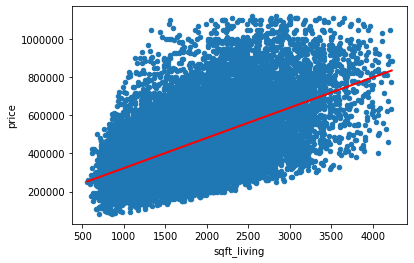

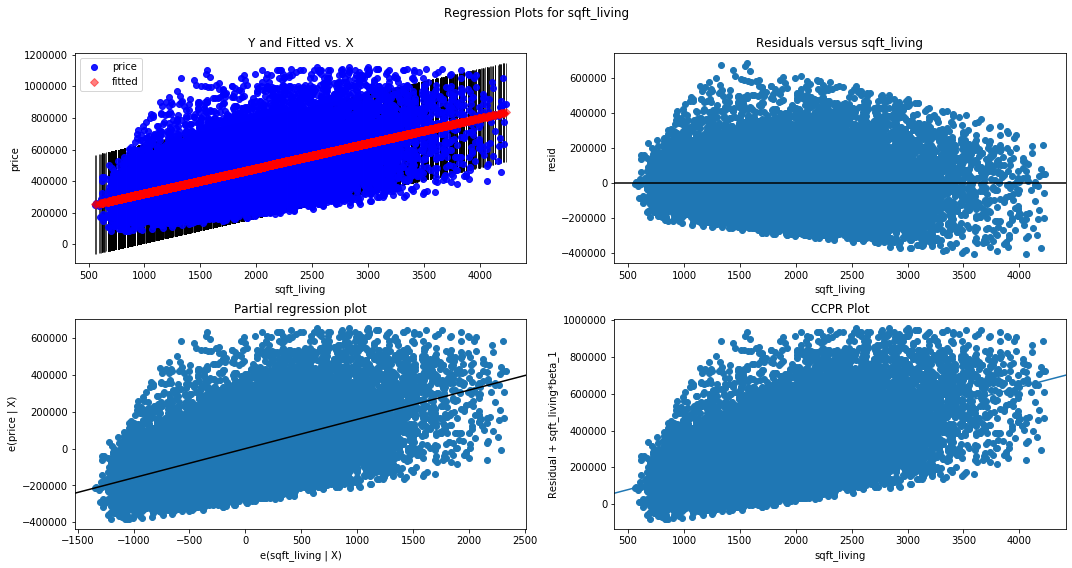

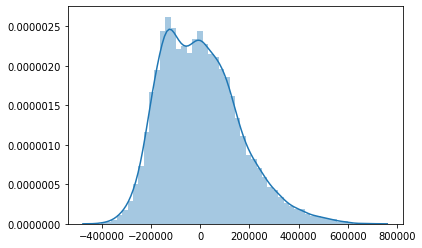

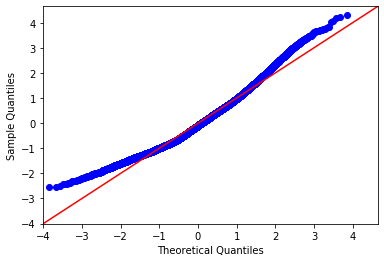

In [4]:
# Create a new Dataframe with the minimum and maximum value of 'sqft_living'
X_new = pd.DataFrame({'sqft_living': [kc_reg.sqft_living.min(), kc_reg.sqft_living.max()]});
# Make predictions on the x values and store them 
preds = model.predict(X_new)
# Plot the observed data and the least squares line
kc_reg.plot(kind='scatter', x='sqft_living', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
# Visualize error terms for variance and heteroscedasticity
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig)
plt.show()
# Show distribution of residuals
sns.distplot(model.resid)
# Create qq plot to check normality assuption
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

#### Insights:
- The _R-squared_ value is _0.305_ i.e, _%_ of the variance in the target variable can be explained by 'sqft_living'. 
- R-squared(Coefficient of determination) also tells us that as a predictor, 'sqft_living' is not a very good fit as only _30%_ of the data points fall within the regression line.
- If we _increase_ 'sqft_living' by 1 unit we can expect the price of a house to _increase_ by _151_.
- The _P-value_ tells us that we can reject the null hypothesis that the _Coefficient = 0_. In other words a changes in 'sqft_living' are related to changes in 'price'.
- If we observe the regression plots we can see a cone-like shape which suggests that the residuals are heteroscedastic. This violates an assumption.
- A normally distributed data has a Skewness between -0.5 and 0.5 and a Kurtosis of 3. The model tells us that we have a Skewness of 0.61 and a Kurtosis of 3.3 this tell us that the data still has quite a few outliers but is pretty normal overall.

In [5]:
# Build a formula. 
f = 'price~distance_from_bellevue'
# Create a fitted model
model = smf.ols(formula=f, data=kc_reg).fit()
# Get regression model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     5570.
Date:                Tue, 09 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:32:39   Log-Likelihood:            -2.3441e+05
No. Observations:               17436   AIC:                         4.688e+05
Df Residuals:                   17434   BIC:                         4.688e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               6.639e+05   2936.232    226.091      0.000    6.58e+05     6.7e+05
distance_from_bellevue -1.867e+04    250.193    -74.632      0.000   -1.92e+04   -1.82e+04
==============================================================================
Omnibus:                     1132.541   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1371.643
Skew:                           0.654   Prob(JB):                    1.42e-298
Kurtosis:                       3.423   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

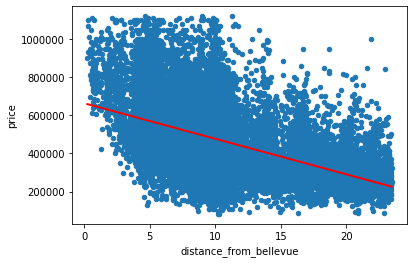

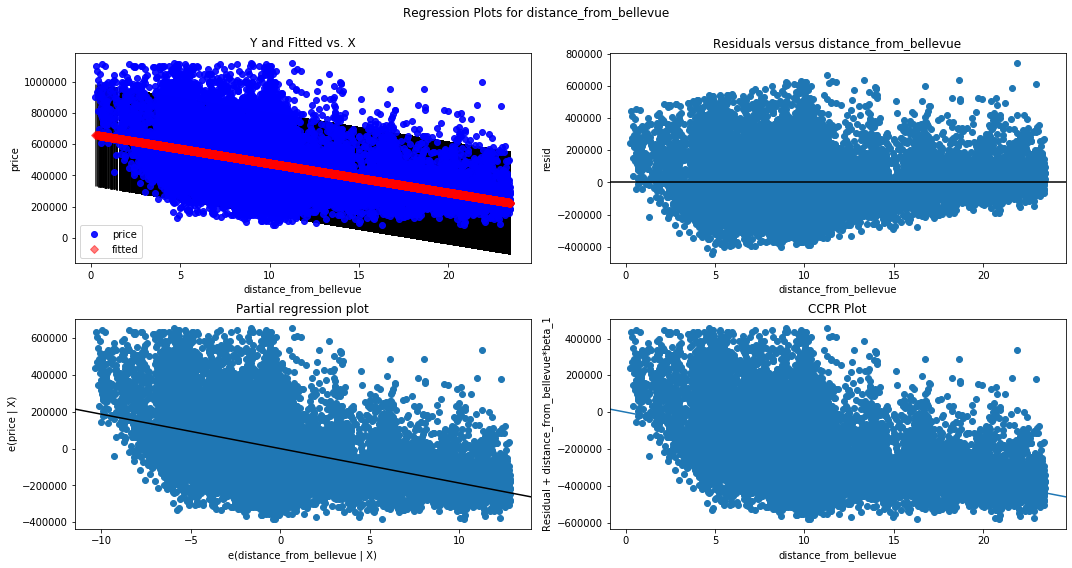

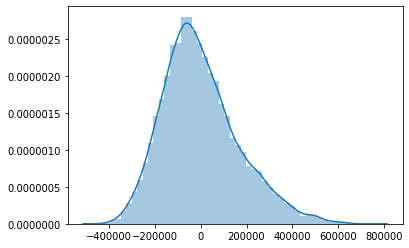

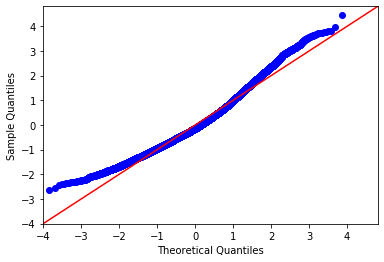

In [6]:
# Create a new Dataframe with the minimum and maximum value of 'distance_from_bellevue'
X_new = pd.DataFrame({'distance_from_bellevue': [kc_reg.distance_from_bellevue.min(),
                                                 kc_reg.distance_from_bellevue.max()]});
# Make predictions on the x values and store them 
preds = model.predict(X_new)
# Plot the observed data and the least squares line
kc_reg.plot(kind='scatter', x='distance_from_bellevue', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
# Visualize error terms for variance and heteroscedasticity
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'distance_from_bellevue', fig=fig)
plt.show()
# Show distribution of residuals
sns.distplot(model.resid)
# Create qq plot to check normality assuption
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

#### Insights:
- The _R-squared_ value is _0.242_ i.e, _24%_ of the variance in the target variable can be explained by 'distance_from_bellevue'. 
- R-squared(Coefficient of determination) also tells us that as a predictor, 'distance_from_bellevue' is also not a very good fit. 
- If we _increase_ 'diatance_from_bellevue' by 1 unit we can expect the price of a house to _decrease_ by _18670_.
- The _P-value_ tells us that we can reject the null hypothesis that the _Coefficient = 0_. In other words a changes in 'distance_from_bellevue' are related to changes in 'price'.
- The residual seem evenly distributed across so the Homoscedasticity assumption is fufilled.
- There is a Skewness of 0.65 which tells us that the data is moderately skewed to the right. The _QQ plot_ looks pretty good so the normality assumption seems fulfilled aswell.

In [7]:
# Build a formula.
f = 'price~grade'
# Create a fitted model
model = smf.ols(formula=f, data=kc_reg).fit()
# Get regression model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     7741.
Date:                Tue, 09 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:32:47   Log-Likelihood:            -2.3362e+05
No. Observations:               17436   AIC:                         4.672e+05
Df Residuals:                   17434   BIC:                         4.673e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.862e+05   1.09e+04    -44.644      0.000   -5.08e+05   -4.65e+05
grade       1.279e+05   1453.217     87.985      0.000    1.25e+05    1.31e+05
==============================================================================
Omnibus:                     1315.125   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1662.028
Skew:                           0.697   Prob(JB):                         0.00
Kurtosis:                       3.587   Cond. No.                         68.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

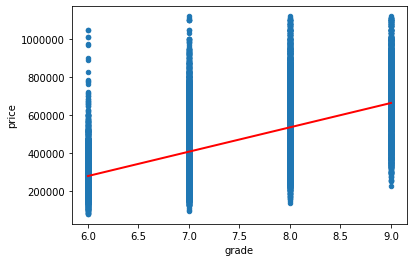

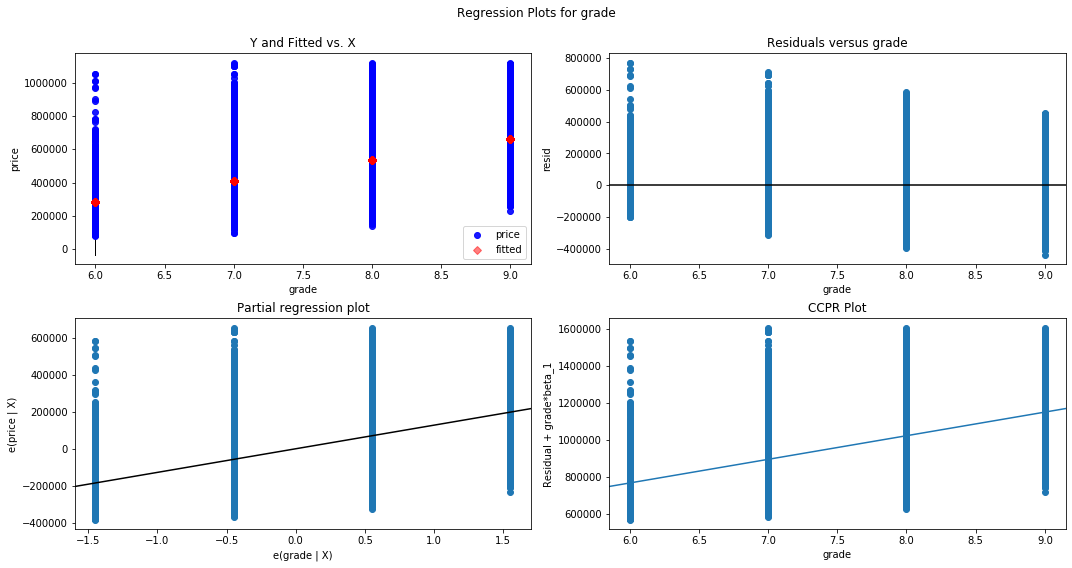

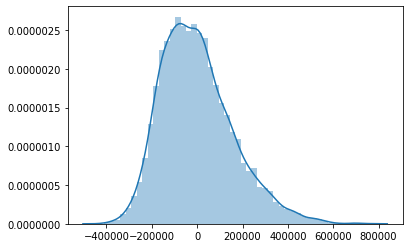

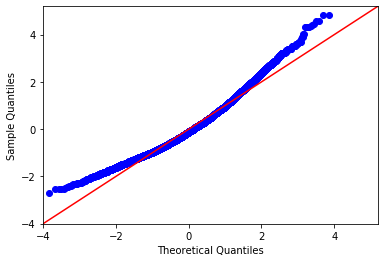

In [8]:
# Create a new Dataframe with the minimum and maximum value of 'grade'
X_new = pd.DataFrame({'grade': [kc_reg.grade.min(), kc_reg.grade.max()]});
# Make predictions on the x values and store them 
preds = model.predict(X_new)
# Plot the observed data and the least squares line
kc_reg.plot(kind='scatter', x='grade', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
# Visualize error terms for variance and heteroscedasticity
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'grade', fig=fig)
plt.show()
# Show distribution of residuals
sns.distplot(model.resid)
# Create qq plot to check normality assuption
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

#### Insights:
- The _R-squared_ value is _0.307_ i.e, _31%_ of the variance in the target variable can be explained by 'grade'.
- Just like 'sqft_living' and 'distance_from_bellevue', 'grade' is not a very good fit.
- If we _increase_ 'grade' by 1 unit we can expect the price of a house to _increase_ by _127900_.
- The _P-value_ tells us that we can reject the null hypothesis that the _Coefficient = 0_. In other words changes in 'grade' are related to changes in 'price'.
- Based on the _QQ plot_ and residual distribution the normality assumption seems fufilled.

> **We don't seem to have any reasonable single Linear Regressions, so we can move on to Multiple regression.**

## Multiple Regression
In order to construct a well functioning Multiple regression model we have to go through some prerequisites:
- Deal with **Categorical data**. Which we've already did in the EDA notebook.
- Handle **Multicollinearity of Features**. If we recall from the EDA notebook we found out the 'sqft_living' and 'sqft_above' are highly correlated. The best option is to get rid of one of the features but I've decided to keep them both as long as they are not used in the same model as this could affect our results.
- **Feature Selection** is another step we can apply to our model when necessary. All features are important to a certain degree but not all of them are absolutely necessary so this step will help us weed out the features that may not be significant to our model.
- **Feature Scaling and Normalization** is another important step in the process. We have a variety of Independent variables that happen to be on different scales, for example, we have 'bedrooms' ranging from 2 to 5 and on the other hand we have 'sqft_living' ranging roughly around 500 to 4000. 'sqft_living' is clearly on a larger scale and can be interpreted as more significant to the target variable than 'bedrooms'. Scaling and normalization can help avoid that.
- **Train-Test Split** to make sure we are not _overfitting_ or _underfitting_ the model to the dataset.

### Modeling for Inference
When modeling for _Inference_ we want to know how a change in _X(independent)_ affects and changes _Y(dependent)_. We are more concerned with the _Coefficients_ of the features than the predictive accuracy of the model.


In [9]:
# Let's first build a model with all the features.
# Define X and Y
X = kc_reg.drop(['price'], axis=1)
y = kc_reg['price']

# Show model summary table
X_int = sm.add_constant(X)
model = sm.OLS(y, X_int).fit()
model.summary()

/usr/local/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     894.8
Date:                Tue, 09 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:32:53   Log-Likelihood:            -2.2182e+05
No. Observations:               17436   AIC:                         4.438e+05
Df Residuals:                   17346   BIC:                         4.445e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.848e+07   4.62e+06      4.000      0.000    9.43e+06    2.75e+07
bedrooms               -3413.3381   1041.999     -3.276      0.001   -5455.761   -1370.915
bathrooms               9804.2715   1509.625      6.495      0.000    6845.255    1.28e+04
sqft_living              103.8988      1.863     55.774      0.000     100.247     107.550
sqft_lot                   0.3593      0.030     11.831      0.000       0.300       0.419
waterfront              1.894e+05   1.38e+04     13.754      0.000    1.62e+05    2.16e+05
view                    3.343e+04   1152.372     29.007      0.000    3.12e+04    3.57e+04
condition                2.38e+04   1098.685     21.665      0.000    2.16e+04     2.6e+04
grade                    4.52e+04   1191.385     37.936      0.000    4.29e+04    4.75e+04
yr_built                -357.6215     40.266     -8.882      0.000    -436.546    -278.697
lat                    -2.139e+04   4.03e+04     -0.531      0.595      -1e+05    5.75e+04
long                      1.4e+05   3.62e+04      3.866      0.000     6.9e+04    2.11e+05
sqft_living15             34.0525      1.856     18.343      0.000      30.414      37.691
sqft_lot15                -0.0180      0.044     -0.411      0.681      -0.104       0.068
basement               -2.175e+04   1628.751    -13.355      0.000   -2.49e+04   -1.86e+04
renovated               3.849e+04   3788.037     10.160      0.000    3.11e+04    4.59e+04
distance_from_bellevue -1.238e+04    670.288    -18.466      0.000   -1.37e+04   -1.11e+04
floor_1_5               7558.2433   2481.098      3.046      0.002    2695.041    1.24e+04
floor_2_0              -1700.9495   2030.193     -0.838      0.402   -5680.332    2278.433
floor_2_5              -6511.5322   9283.090     -0.701      0.483   -2.47e+04    1.17e+04
floor_3_0              -4.611e+04   4654.578     -9.906      0.000   -5.52e+04    -3.7e+04
floor_3_5              -7.568e+04   3.66e+04     -2.070      0.039   -1.47e+05   -4003.061
zip_98001               2.104e+05   6.89e+04      3.052      0.002    7.53e+04    3.46e+05
zip_98002               2.172e+05    6.7e+04      3.242      0.001    8.59e+04    3.48e+05
zip_98003               2.108e+05   7.03e+04      2.997      0.003    7.29e+04    3.49e+05
zip_98004               4.815e+05   6.57e+04      7.330      0.000    3.53e+05     6.1e+05
zip_98005                3.08e+05   6.48e+04      4.754      0.000    1.81e+05    4.35e+05
zip_98006               2.675e+05   6.38e+04      4.191      0.000    1.42e+05    3.93e+05
zip_98007               2.246e+05   6.42e+04      3.499      0.000    9.88e+04     3.5e+05
zip_98008               2.334e+05   6.34e+04      3.683      0.000    1.09e+05    3.58e+05
zip_98010               2.639e+05   6.08e+04      4.338      0.000    1.45e+05  

> The model has a $ R^2 $ of **0.821** or **82%**, which defines a pretty high _**Goodness of fit**_. The goal of this project is to find the features with the highest Coefficents. _Recursive Feature Elimination(RFE)_ lets us do just that.

## Final Model
For our final model we want the features with the highest Coefficents. There are currently 89 features in the dataset. Let's preselect some features to build our model on.

In [10]:
predictors = kc_reg[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_living15', 'distance_from_bellevue',
                     'waterfront', 'basement', 'renovated', 'yr_built', 'grade', 'condition', 'lat',
                     'long']]
predictors.head()

,bedrooms,bathrooms,sqft_living,sqft_living15,distance_from_bellevue,waterfront,basement,renovated,yr_built,grade,condition,lat,long
0,3,1.0,1180,1340,7.622786,0.0,0,0,1955,7,3,47.5112,-122.257
1,3,2.5,2570,1690,9.041882,0.0,1,1,1951,7,3,47.7210,-122.319
2,2,1.0,770,2720,8.561145,0.0,0,0,1933,6,3,47.7379,-122.233
3,4,3.0,1960,1360,10.979730,0.0,1,0,1965,7,5,47.5208,-122.393
4,3,2.0,1680,1800,7.402273,0.0,0,0,1987,8,3,47.6168,-122.045


In [11]:
# Model with selected features
X_int = sm.add_constant(predictors)
model = sm.OLS(y, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     2885.
Date:                Tue, 09 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:32:53   Log-Likelihood:            -2.2682e+05
No. Observations:               17436   AIC:                         4.537e+05
Df Residuals:                   17422   BIC:                         4.538e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.122e+07   1.01e+06    -11.075      0.000   -1.32e+07   -9.23e+06
bedrooms               -1.752e+04   1337.694    -13.096      0.000   -2.01e+04   -1.49e+04
bathrooms               2.567e+04   1916.500     13.393      0.000    2.19e+04    2.94e+04
sqft_living               90.9870      2.383     38.183      0.000      86.316      95.658
sqft_living15             48.0503      2.299     20.899      0.000      43.544      52.557
distance_from_bellevue -1.159e+04    228.755    -50.687      0.000    -1.2e+04   -1.11e+04
waterfront              2.631e+05   1.72e+04     15.298      0.000    2.29e+05    2.97e+05
basement               -6947.7434   1883.528     -3.689      0.000   -1.06e+04   -3255.840
renovated               4.114e+04   4986.490      8.251      0.000    3.14e+04    5.09e+04
yr_built               -1397.8638     43.522    -32.119      0.000   -1483.171   -1312.556
grade                   7.477e+04   1494.221     50.040      0.000    7.18e+04    7.77e+04
condition               2.348e+04   1399.116     16.785      0.000    2.07e+04    2.62e+04
lat                     2.576e+05   8383.165     30.728      0.000    2.41e+05    2.74e+05
long                   -1.157e+04   7327.896     -1.578      0.115   -2.59e+04    2797.639
==============================================================================
Omnibus:                     1378.991   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2253.448
Skew:                           0.602   Prob(JB):                         0.00
Kurtosis:                       4.285   Cond. No.                     4.19e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> This model has a $ R^2 $ of **0.683** or **68%**, which defines a good enough _**Goodness of fit**_. With just 13 features we were able to get a $ R^2 $ just 12% short of the original model with all 89 features.

### _Recursive Feature Elimination(RFE)_
Next we will be using RFE to determine which features out of the chosen 14 features have the highest Coefficents.

In [12]:
# Use RFE to get features with the highest coefficients
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=6)
selector = selector.fit(predictors, y)

In [13]:
# Boolean mask to pop out names of selected columns
selector.support_ * np.array(predictors.columns)

array(['', '', '', '', '', 'waterfront', 'basement', 'renovated', '',
       'grade', 'condition', 'lat', ''], dtype=object)

In [14]:
# Build a model with the selected features. Adding 'distance_from_bellevue' increases R-squared by 5%
formula = 'price ~ waterfront + lat + renovated + grade + condition + basement + distance_from_bellevue'
model = smf.ols(formula=formula, data=kc_reg).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     3366.
Date:                Tue, 09 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:32:54   Log-Likelihood:            -2.2937e+05
No. Observations:               17436   AIC:                         4.588e+05
Df Residuals:                   17428   BIC:                         4.588e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.287e+07   4.62e+05    -27.886      0.000   -1.38e+07    -1.2e+07
waterfront              2.989e+05   1.99e+04     15.057      0.000     2.6e+05    3.38e+05
lat                     2.599e+05   9660.841     26.902      0.000    2.41e+05    2.79e+05
renovated               9.906e+04   5512.767     17.969      0.000    8.83e+04     1.1e+05
grade                   1.261e+05   1158.320    108.860      0.000    1.24e+05    1.28e+05
condition               4.306e+04   1510.364     28.512      0.000    4.01e+04     4.6e+04
basement                3.059e+04   1990.115     15.372      0.000    2.67e+04    3.45e+04
distance_from_bellevue -1.182e+04    258.635    -45.696      0.000   -1.23e+04   -1.13e+04
==============================================================================
Omnibus:                     1474.015   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2134.907
Skew:                           0.680   Prob(JB):                         0.00
Kurtosis:                       4.043   Cond. No.                     2.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# Assign the final features to a new variable
final_feat = kc_reg[['waterfront', 'lat', 'renovated', 'grade', 'condition', 'basement', 'distance_from_bellevue']]
# Print Coefficient of each feature in final model
linreg.fit(final_feat, y)
coefficients = dict(zip(final_feat,list(linreg.coef_)))
coefficients

{'waterfront': 298925.9457732979,
 'lat': 259895.69770877002,
 'renovated': 99057.99930034808,
 'grade': 126094.41233987836,
 'condition': 43062.807187351806,
 'basement': 30591.38081738778,
 'distance_from_bellevue': -11818.653036704172}

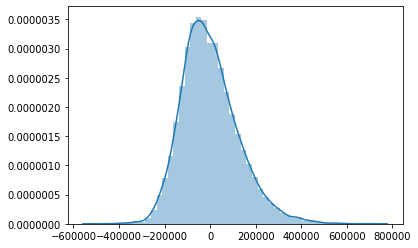

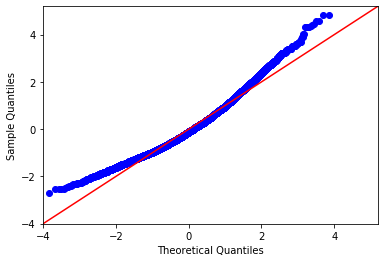

In [16]:
# Check residual distribution
sns.distplot(model.resid)
plt.show()
# QQ Plot
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

> The final model has a $ R^2 $ of _**0.575**_, this tells us the the model explains _**58%**_ of the variability of the response data around it's mean. Looking at the displot graph ans QQ plot we can see that the data is moderately normal.

### Train-Test Split
Now that we've selected the features for our final model we will now test _overfitting_ and _underfitting_

In [17]:
# Split the data into Train-Test
X_train, X_test, y_train, y_test = train_test_split(final_feat, y, test_size=0.2, random_state=42)

In [18]:
# Calculate and compare MSE of train and test data
model_test = linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
# Calculate MSE with sklearn mean_squared_error() function
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

#Use .score to return R^2 of current test
R_squared = model_test.score(X_test, y_test)
print('This iteration has an R-squared value of:', R_squared)


Train Mean Squarred Error: 15599269087.777153
Test Mean Squarred Error: 15732620019.109932
This iteration has an R-squared value of: 0.5892181011176773


> The MSE of both the train and the test split are close which tells us the data model isn;t overfitted. The $ R^2 $ value of 59% is also a good sign that the model fits well.

## Conclusion
* If a property is near a Waterfront we expect it to cost about 298,925 more.
* Renovating a property can increase the value by 99,057.
* An increase in the Grade due to renovations can bring the house value up by 126,094.
* In addition to grade an increase in the Condition of a house causes an increase of 43,062 in price of property.
* Properties with Basement cost an additional 30,591.
* The further away a house is from Bellevue city the less it cost, ie, 11,818 is lost the further away a property is from Bellevue. 